# Project: Stock Market Analysis and Prediction

## Stock Market Data From Google Finance

### Introduction

   Stock Market Analysis and Prediction is the project on technical analysis, visualization and prediction using data provided by Google Finance. By looking at data from the stock market, particularly some giant technology stocks and others. Used pandas to get stock information, visualize different aspects of it, and finally looked at a few ways of analyzing the risk of a stock, based on its previous performance history. Predicted future stock prices through a Monte Carlo method!
   
### Questions

In this analysis, I would like to explore the following questions.

1. What was the change in price of the stock over time?
2. What was the daily return of the stock on average?
3. What was the moving average of the various stocks?
4. What was the correlation between different stocks' closing prices?
4. What was the correlation between different stocks' daily returns?
5. How much value do we put at risk by investing in a particular stock?
6. How can we attempt to predict future stock behavior?

In [3]:
# For Data Processing
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


In [6]:
!pip install yfinance



In [7]:
import yfinance as yf
from datetime import datetime

# Example usage: ftching stock data for Apple Inc. (AAPL)
start_date = datetime(2020, 1, 1)
end_date = datetime(2021, 1, 1)

stock_data = yf.download('AAPL', start=start_date, end=end_date)
print(stock_data)


[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-01-02   74.059998   75.150002   73.797501   75.087502   72.960464   
2020-01-03   74.287498   75.144997   74.125000   74.357498   72.251137   
2020-01-06   73.447502   74.989998   73.187500   74.949997   72.826859   
2020-01-07   74.959999   75.224998   74.370003   74.597504   72.484352   
2020-01-08   74.290001   76.110001   74.290001   75.797501   73.650352   
...                ...         ...         ...         ...         ...   
2020-12-24  131.320007  133.460007  131.100006  131.970001  129.339035   
2020-12-28  133.990005  137.339996  133.509995  136.690002  133.964966   
2020-12-29  138.050003  138.789993  134.339996  134.869995  132.181198   
2020-12-30  135.580002  135.990005  133.399994  133.720001  131.054123   
2020-12-31  134.080002  134.740005  131.720001  132.690002  130.044693   

               Volume  
Date         

[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-01-02   74.059998   75.150002   73.797501   75.087502   72.960457   
2020-01-03   74.287498   75.144997   74.125000   74.357498   72.251144   
2020-01-06   73.447502   74.989998   73.187500   74.949997   72.826866   
2020-01-07   74.959999   75.224998   74.370003   74.597504   72.484360   
2020-01-08   74.290001   76.110001   74.290001   75.797501   73.650345   
...                ...         ...         ...         ...         ...   
2020-12-24  131.320007  133.460007  131.100006  131.970001  129.339035   
2020-12-28  133.990005  137.339996  133.509995  136.690002  133.964920   
2020-12-29  138.050003  138.789993  134.339996  134.869995  132.181229   
2020-12-30  135.580002  135.990005  133.399994  133.720001  131.054169   
2020-12-31  134.080002  134.740005  131.720001  132.690002  130.044708   

               Volume  
Date         

In [3]:
# Install necessary libraries
!pip install --upgrade pandas_datareader alpha_vantage

import pandas_datareader.data as pdr
from datetime import datetime
from alpha_vantage.timeseries import TimeSeries

# Define the start and end dates
start_date = datetime(2020, 1, 1)
end_date = datetime(2021, 1, 1)

# Fetch stock data for Apple Inc. (AAPL) using Yahoo Finance
try:
    stock_data = pdr.get_data_yahoo('AAPL', start=start_date, end=end_date)
    print("Yahoo Finance Data:")
    print(stock_data)
except Exception as e:
    print(f"Failed to fetch data from Yahoo Finance: {e}")

# Replace 'YOUR_ALPHA_VANTAGE_API_KEY' with your actual Alpha Vantage API key
api_key = 'YOUR_ALPHA_VANTAGE_API_KEY'
ts = TimeSeries(key=api_key, output_format='pandas')

# Fetch daily stock data for Apple Inc. (AAPL) using Alpha Vantage
try:
    data, meta_data = ts.get_daily(symbol='AAPL', outputsize='full')
    # Filter data within the specified date range
    data = data[(data.index >= start_date) & (data.index <= end_date)]
    print("\nAlpha Vantage Data:")
    print(data)
except Exception as e:
    print(f"Failed to fetch data from Alpha Vantage: {e}")


  Obtaining dependency information for alpha_vantage from https://files.pythonhosted.org/packages/99/54/d9147df53e87c48795918a43c744fd81586201ad46ce558c77536aeb7bc7/alpha_vantage-3.0.0-py3-none-any.whl.metadata
Failed to fetch data from Yahoo Finance: 'NoneType' object has no attribute 'group'

Alpha Vantage Data:
            1. open  2. high    3. low  4. close    5. volume
date                                                         
2020-12-31   134.08  134.740  131.7200    132.69   99116586.0
2020-12-30   135.58  135.990  133.4000    133.72   96452124.0
2020-12-29   138.05  138.789  134.3409    134.87  121047324.0
2020-12-28   133.99  137.340  133.5100    136.69  123124632.0
2020-12-24   131.32  133.460  131.1000    131.97   54930064.0
...             ...      ...       ...       ...          ...
2020-01-08   297.16  304.440  297.1600    303.19   33090946.0
2020-01-07   299.84  300.900  297.4800    298.39   27877655.0
2020-01-06   293.79  299.960  292.7500    299.80   29644644.0
20

#### Section 1 - Basic Analysis of Stock Information


In this section I'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.


In [8]:
# Install necessary libraries
!pip install yfinance

import yfinance as yf
from datetime import datetime, timedelta

# List of Tech stocks for analytics
tech_list = ['AAPL', 'GOOGL', 'MSFT', 'AMZN']

# Set up Start and End time for data grab
end = datetime.now()
start = end - timedelta(days=365)

# For-loop for grabbing Yahoo Finance data and setting as a dataframe
# Set DataFrame as the Stock Ticker
for stock in tech_list:
    try:
        globals()[stock] = yf.download(stock, start=start, end=end)
        print(f"Data for {stock}:\n", globals()[stock].head(), "\n")
    except Exception as e:
        print(f"Failed to fetch data for {stock}: {e}")


[*********************100%%**********************]  1 of 1 completed


Data for AAPL:
                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-07-24  193.410004  194.910004  192.250000  192.750000  191.731750   
2023-07-25  193.330002  194.440002  192.919998  193.619995  192.597153   
2023-07-26  193.669998  195.639999  193.320007  194.500000  193.472504   
2023-07-27  196.020004  197.199997  192.550003  193.220001  192.199280   
2023-07-28  194.669998  196.630005  194.139999  195.830002  194.795486   

              Volume  
Date                  
2023-07-24  45377800  
2023-07-25  37283200  
2023-07-26  47471900  
2023-07-27  47460200  
2023-07-28  48291400   



[*********************100%%**********************]  1 of 1 completed


Data for GOOGL:
                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-07-24  121.660004  123.000000  120.980003  121.529999  121.390678   
2023-07-25  121.360001  123.150002  121.019997  122.209999  122.069901   
2023-07-26  130.070007  130.979996  128.320007  129.270004  129.121811   
2023-07-27  131.669998  133.240005  128.789993  129.399994  129.251648   
2023-07-28  130.779999  133.740005  130.570007  132.580002  132.428009   

              Volume  
Date                  
2023-07-24  29686100  
2023-07-25  52509600  
2023-07-26  61682100  
2023-07-27  44952100  
2023-07-28  36591200   



[*********************100%%**********************]  1 of 1 completed


Data for MSFT:
                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-07-24  345.850006  346.920013  342.309998  345.109985  342.431244   
2023-07-25  347.109985  351.890015  345.070007  350.980011  348.255707   
2023-07-26  341.440002  344.670013  333.109985  337.769989  335.148224   
2023-07-27  340.480011  341.329987  329.049988  330.720001  328.152985   
2023-07-28  333.670013  340.010010  333.170013  338.369995  335.743591   

              Volume  
Date                  
2023-07-24  26678100  
2023-07-25  41637700  
2023-07-26  58383700  
2023-07-27  39635300  
2023-07-28  28484900   



[*********************100%%**********************]  1 of 1 completed

Data for AMZN:
                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-07-24  130.309998  131.660004  128.350006  128.800003  128.800003   
2023-07-25  129.309998  129.580002  128.529999  129.130005  129.130005   
2023-07-26  126.510002  129.080002  126.110001  128.149994  128.149994   
2023-07-27  131.000000  132.630005  127.790001  128.250000  128.250000   
2023-07-28  129.690002  133.009995  129.330002  132.210007  132.210007   

              Volume  
Date                  
2023-07-24  45591100  
2023-07-25  39236700  
2023-07-26  53910100  
2023-07-27  52610700  
2023-07-28  46317400   



Quick note: Using globals() is a sloppy way of setting the DataFrame names, but its simple

Let's go ahead and play aorund with the AAPL(Apple) Stock DataFrame to get a feel for the data.

In [9]:
AAPL.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-07-24  193.410004  194.910004  192.250000  192.750000  191.731750   
2023-07-25  193.330002  194.440002  192.919998  193.619995  192.597153   
2023-07-26  193.669998  195.639999  193.320007  194.500000  193.472504   
2023-07-27  196.020004  197.199997  192.550003  193.220001  192.199280   
2023-07-28  194.669998  196.630005  194.139999  195.830002  194.795486   

              Volume  
Date                  
2023-07-24  45377800  
2023-07-25  37283200  
2023-07-26  47471900  
2023-07-27  47460200  
2023-07-28  48291400

In [10]:
# Summery stats for Apple Stock
AAPL.describe()

Open        High         Low       Close   Adj Close  \
count  251.000000  251.000000  251.000000  251.000000  251.000000   
mean   186.172510  187.792909  184.637649  186.242988  185.828725   
std     14.828554   14.998258   14.544954   14.806036   14.919826   
min    165.350006  166.399994  164.080002  165.000000  164.776505   
25%    175.244995  177.025002  173.660004  175.280006  174.800789   
50%    183.550003  185.089996  181.919998  183.860001  183.394669   
75%    192.395004  193.695000  191.254997  192.474998  191.969330   
max    236.479996  237.229996  233.089996  234.820007  234.820007   

             Volume  
count  2.510000e+02  
mean   6.047018e+07  
std    2.467486e+07  
min    2.404830e+07  
25%    4.738880e+07  
50%    5.379050e+07  
75%    6.604875e+07  
max    2.464214e+08

In [11]:
# General Info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-07-24 to 2024-07-22
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


Now that we've seen the DataFrame, let's go ahead and plot out the volume and closing price of the AAPL(Apple) stocks.

<Axes: xlabel='Date'>

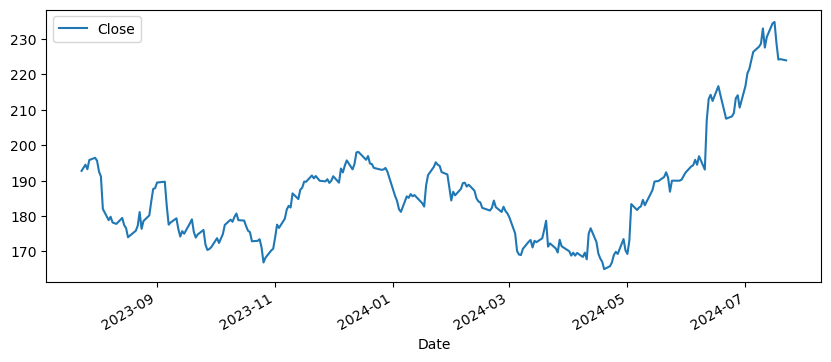

In [12]:
# Let's see a historical view of the closing price
AAPL['Close'].plot(legend=True, figsize=(10,4))

<Axes: xlabel='Date'>

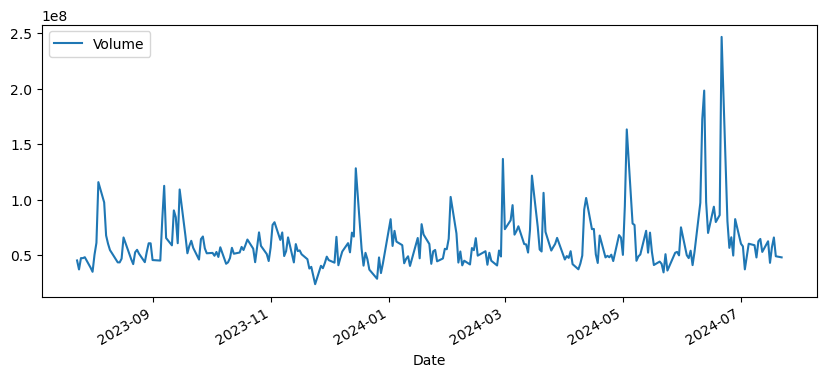

In [13]:
# Now let's plot the total volume of stock being traded each day over the past year

AAPL['Volume'].plot(legend=True, figsize=(10,4))

We can see that on Feb'2017 was the higher for AAPL stock being traded.

Now that we've seen the visualizations for the closing price and the volume traded each day for AAPL stock.
Let's go ahead and caculate the moving average for the AAPL stock.


For more info on the Moving Average(SMA & EMA) check out the following links:

1.) http://www.investopedia.com/terms/m/movingaverage.asp

2.) http://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp

In [15]:
# Ensure pandas is imported
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta

# List of Tech stocks for analytics
tech_list = ['AAPL', 'GOOGL', 'MSFT', 'AMZN']

# Set up Start and End time for data grab
end = datetime.now()
start = end - timedelta(days=365)

# Fetch data for AAPL as an example
AAPL = yf.download('AAPL', start=start, end=end)

# Calculate and plot out several moving averages
MA_day = [10, 20, 50, 100]

for ma in MA_day:
    column_name = f'MA for {ma} days'
    AAPL[column_name] = AAPL['Close'].rolling(window=ma).mean()

print(AAPL.head())


[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-07-24  193.410004  194.910004  192.250000  192.750000  191.731766   
2023-07-25  193.330002  194.440002  192.919998  193.619995  192.597153   
2023-07-26  193.669998  195.639999  193.320007  194.500000  193.472519   
2023-07-27  196.020004  197.199997  192.550003  193.220001  192.199280   
2023-07-28  194.669998  196.630005  194.139999  195.830002  194.795486   

              Volume  MA for 10 days  MA for 20 days  MA for 50 days  \
Date                                                                   
2023-07-24  45377800             NaN             NaN             NaN   
2023-07-25  37283200             NaN             NaN             NaN   
2023-07-26  47471900             NaN             NaN             NaN   
2023-07-27  47460200             NaN             NaN             NaN   
2023-07-28  48291400             NaN             

Now, lets plot all the additional Moving Averages for AAPL stock

<Axes: xlabel='Date'>

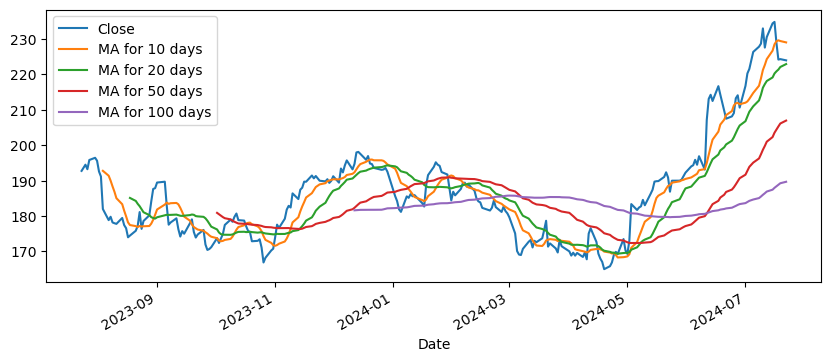

In [16]:
AAPL[['Close','MA for 10 days','MA for 20 days','MA for 50 days','MA for 100 days']].plot(subplots=False,figsize=(10,4))

#### Section 2 - Daily Return Analysis


Now, that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. 


In order to do so, we need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve the daily returns for the APPL stock.


<Axes: xlabel='Date'>

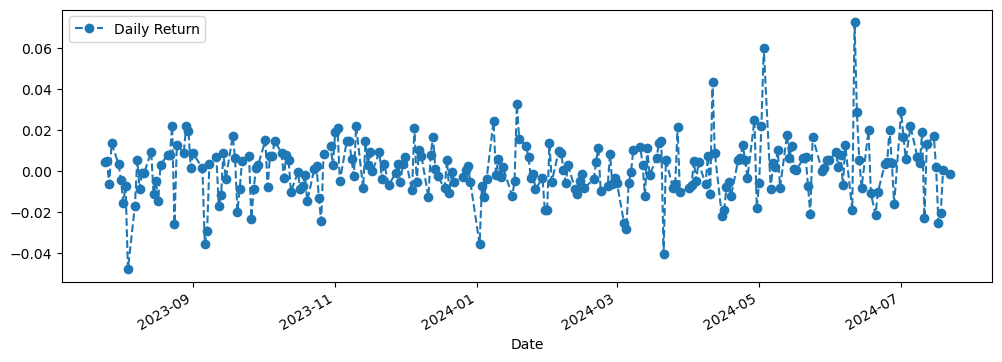

In [17]:
# We'll use pct_change to find the percent change for each day
AAPL['Daily Return'] = AAPL['Close'].pct_change()

# Lets plot the daily return percentage
AAPL['Daily Return'].plot(figsize=(12,4), legend=True, linestyle='--', marker='o')

Great, now let's get an overall look at the average daily return using a histogram. By using seaborn to create both a histogram and kde plot on the same figure.

<Axes: >

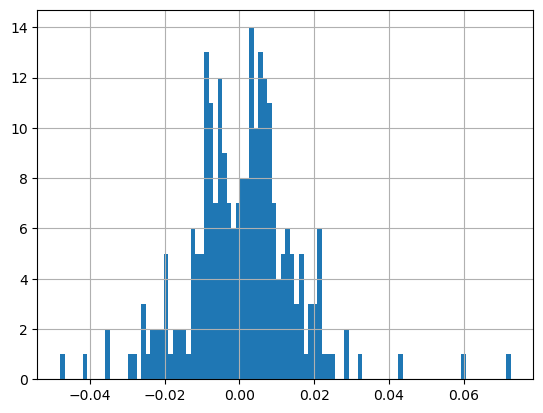

In [18]:
# only with histogram
AAPL['Daily Return'].hist(bins=100)

[*********************100%%**********************]  1 of 1 completed


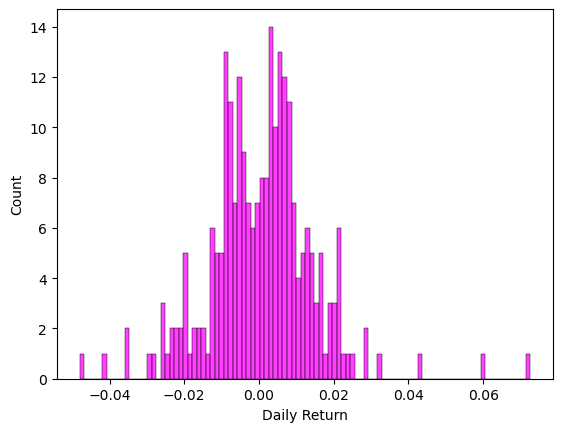

In [20]:
# Ensure necessary libraries are imported
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt

# List of Tech stocks for analytics
tech_list = ['AAPL', 'GOOGL', 'MSFT', 'AMZN']

# Set up Start and End time for data grab
end = datetime.now()
start = end - timedelta(days=365)

# Fetch data for AAPL as an example
AAPL = yf.download('AAPL', start=start, end=end)

# Calculate and plot out several moving averages
MA_day = [10, 20, 50, 100]

for ma in MA_day:
    column_name = f'MA for {ma} days'
    AAPL[column_name] = AAPL['Close'].rolling(window=ma).mean()

# Calculate daily return
AAPL['Daily Return'] = AAPL['Close'].pct_change()

# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.histplot(AAPL['Daily Return'].dropna(), bins=100, color='magenta')

# Show the plot
plt.show()


Now what if we wanted to analyze the returns of all the stocks in our list? For that, we need to build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [22]:
# Ensure necessary libraries are imported
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta

# List of Tech stocks for analytics
tech_list = ['AAPL', 'GOOGL', 'MSFT', 'AMZN']

# Set up Start and End time for data grab
end = datetime.now()
start = end - timedelta(days=365)

# Initialize an empty DataFrame to store closing prices
closingprice_df = pd.DataFrame()

# For-loop to fetch data for each stock and store the closing prices
for stock in tech_list:
    try:
        stock_data = yf.download(stock, start=start, end=end)
        closingprice_df[stock] = stock_data['Close']
    except Exception as e:
        print(f"Failed to fetch data for {stock}: {e}")

# Display the combined DataFrame
print(closingprice_df.head())


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

                  AAPL       GOOGL        MSFT        AMZN
Date                                                      
2023-07-24  192.750000  121.529999  345.109985  128.800003
2023-07-25  193.619995  122.209999  350.980011  129.130005
2023-07-26  194.500000  129.270004  337.769989  128.149994
2023-07-27  193.220001  129.399994  330.720001  128.250000
2023-07-28  195.830002  132.580002  338.369995  132.210007


In [23]:
closingprice_df.head(10)

AAPL       GOOGL        MSFT        AMZN
Date                                                      
2023-07-24  192.750000  121.529999  345.109985  128.800003
2023-07-25  193.619995  122.209999  350.980011  129.130005
2023-07-26  194.500000  129.270004  337.769989  128.149994
2023-07-27  193.220001  129.399994  330.720001  128.250000
2023-07-28  195.830002  132.580002  338.369995  132.210007
2023-07-31  196.449997  132.720001  335.920013  133.679993
2023-08-01  195.610001  131.550003  336.339996  131.690002
2023-08-02  192.580002  128.380005  327.500000  128.210007
2023-08-03  191.169998  128.449997  326.660004  128.910004
2023-08-04  181.990005  128.110001  327.779999  139.570007

Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks, like we did for the APPL stock.

In [24]:
# make a new tech returns DataFrame
tech_returns = closingprice_df.pct_change()

In [25]:
tech_returns.head()

AAPL     GOOGL      MSFT      AMZN
Date                                              
2023-07-24       NaN       NaN       NaN       NaN
2023-07-25  0.004514  0.005595  0.017009  0.002562
2023-07-26  0.004545  0.057769 -0.037638 -0.007589
2023-07-27 -0.006581  0.001006 -0.020872  0.000780
2023-07-28  0.013508  0.024575  0.023131  0.030877

Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a stock compared to itself.

##### GOOGL is a Alphabet Inc Class A Stock.

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


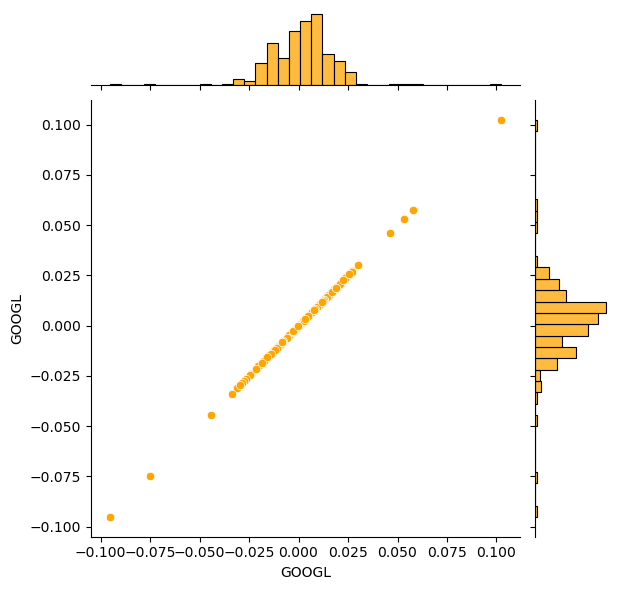

In [29]:
# Ensure necessary libraries are imported
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt

# List of Tech stocks for analytics
tech_list = ['AAPL', 'GOOGL', 'MSFT', 'AMZN']

# Set up Start and End time for data grab
end = datetime.now()
start = end - timedelta(days=365)

# Initialize an empty DataFrame to store closing prices
closingprice_df = pd.DataFrame()

# For-loop to fetch data for each stock and store the closing prices
for stock in tech_list:
    try:
        stock_data = yf.download(stock, start=start, end=end)
        closingprice_df[stock] = stock_data['Close']
    except Exception as e:
        print(f"Failed to fetch data for {stock}: {e}")

# Calculate daily returns
tech_returns = closingprice_df.pct_change()

# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOGL', y='GOOGL', data=tech_returns, kind='scatter', color='orange')

# Show the plot
plt.show()


So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. 

So let's go ahead and compare Google and Amazon the same way.

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


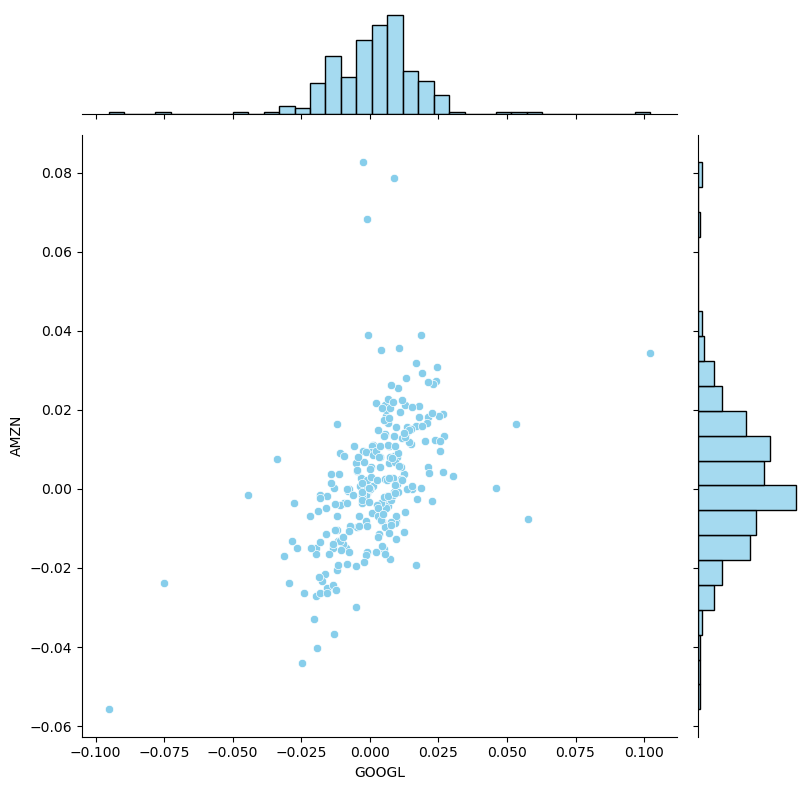

In [31]:
# Ensure necessary libraries are imported
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt

# List of Tech stocks for analytics
tech_list = ['AAPL', 'GOOGL', 'MSFT', 'AMZN']

# Set up Start and End time for data grab
end = datetime.now()
start = end - timedelta(days=365)

# Initialize an empty DataFrame to store closing prices
closingprice_df = pd.DataFrame()

# For-loop to fetch data for each stock and store the closing prices
for stock in tech_list:
    try:
        stock_data = yf.download(stock, start=start, end=end)
        closingprice_df[stock] = stock_data['Close']
    except Exception as e:
        print(f"Failed to fetch data for {stock}: {e}")

# Calculate daily returns
tech_returns = closingprice_df.pct_change()

# Compare the daily returns of Google and Amazon
sns.jointplot(x='GOOGL', y='AMZN', data=tech_returns, kind='scatter', height=8, color='skyblue')

# Show the plot
plt.show()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


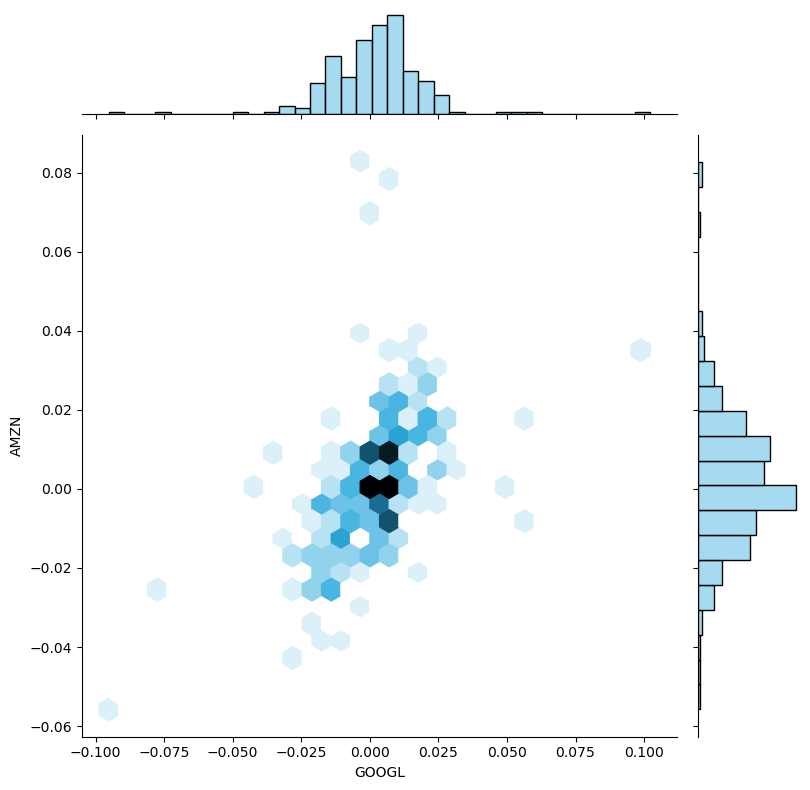

In [34]:
# Ensure necessary libraries are imported
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt

# List of Tech stocks for analytics
tech_list = ['AAPL', 'GOOGL', 'MSFT', 'AMZN']

# Set up Start and End time for data grab
end = datetime.now()
start = end - timedelta(days=365)

# Initialize an empty DataFrame to store closing prices
closingprice_df = pd.DataFrame()

# For-loop to fetch data for each stock and store the closing prices
for stock in tech_list:
    try:
        stock_data = yf.download(stock, start=start, end=end)
        closingprice_df[stock] = stock_data['Close']
    except Exception as e:
        print(f"Failed to fetch data for {stock}: {e}")

# Calculate daily returns
tech_returns = closingprice_df.pct_change()

# Compare the daily returns of Google and Amazon with a hex plot
sns.jointplot(x='GOOGL', y='AMZN', data=tech_returns, kind='hex', height=8, color='skyblue')

# Show the plot
plt.show()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


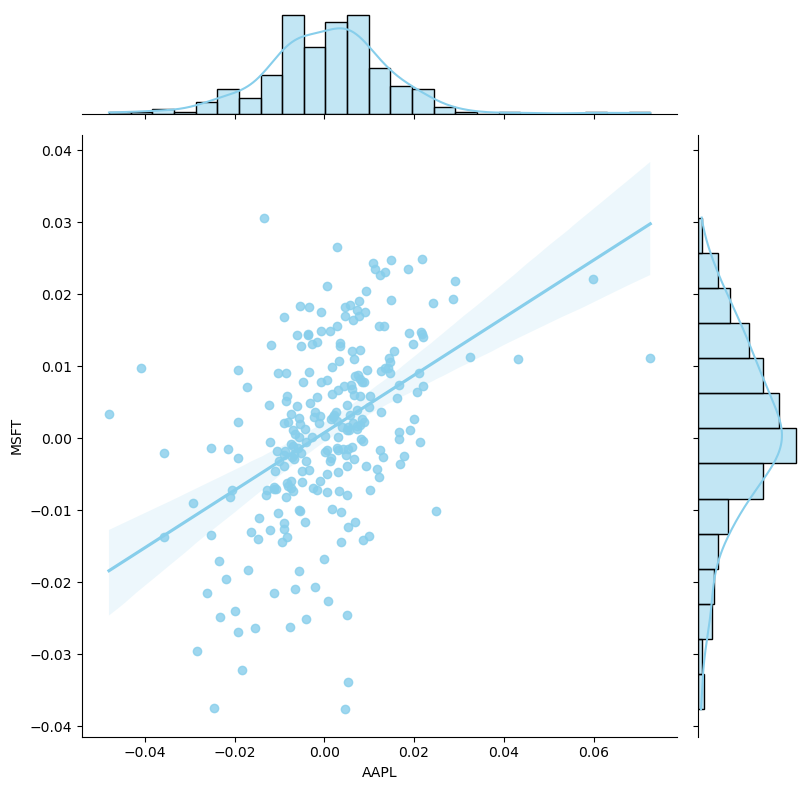

In [36]:
# Ensure necessary libraries are imported
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt

# List of Tech stocks for analytics
tech_list = ['AAPL', 'GOOGL', 'MSFT', 'AMZN']

# Set up Start and End time for data grab
end = datetime.now()
start = end - timedelta(days=365)

# Initialize an empty DataFrame to store closing prices
closingprice_df = pd.DataFrame()

# For-loop to fetch data for each stock and store the closing prices
for stock in tech_list:
    try:
        stock_data = yf.download(stock, start=start, end=end)
        closingprice_df[stock] = stock_data['Close']
    except Exception as e:
        print(f"Failed to fetch data for {stock}: {e}")

# Calculate daily returns
tech_returns = closingprice_df.pct_change()

# Compare the daily returns of Apple and Microsoft with a regression plot
sns.jointplot(x='AAPL', y='MSFT', data=tech_returns, kind='reg', height=8, color='skyblue')

# Show the plot
plt.show()


Intersting, the pearsonr value (officially known as the Pearson product-moment correlation coefficient) can give you a sense of how correlated the daily percentage returns are. You can find more information about it at this link:

Url - http://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient

But for a quick intuitive sense, check out the picture below.

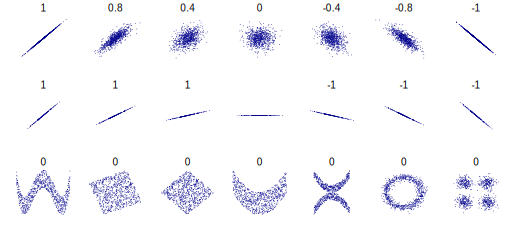

In [37]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

Seaborn and Pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

A:\PROJECT\ana\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
A:\PROJECT\ana\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


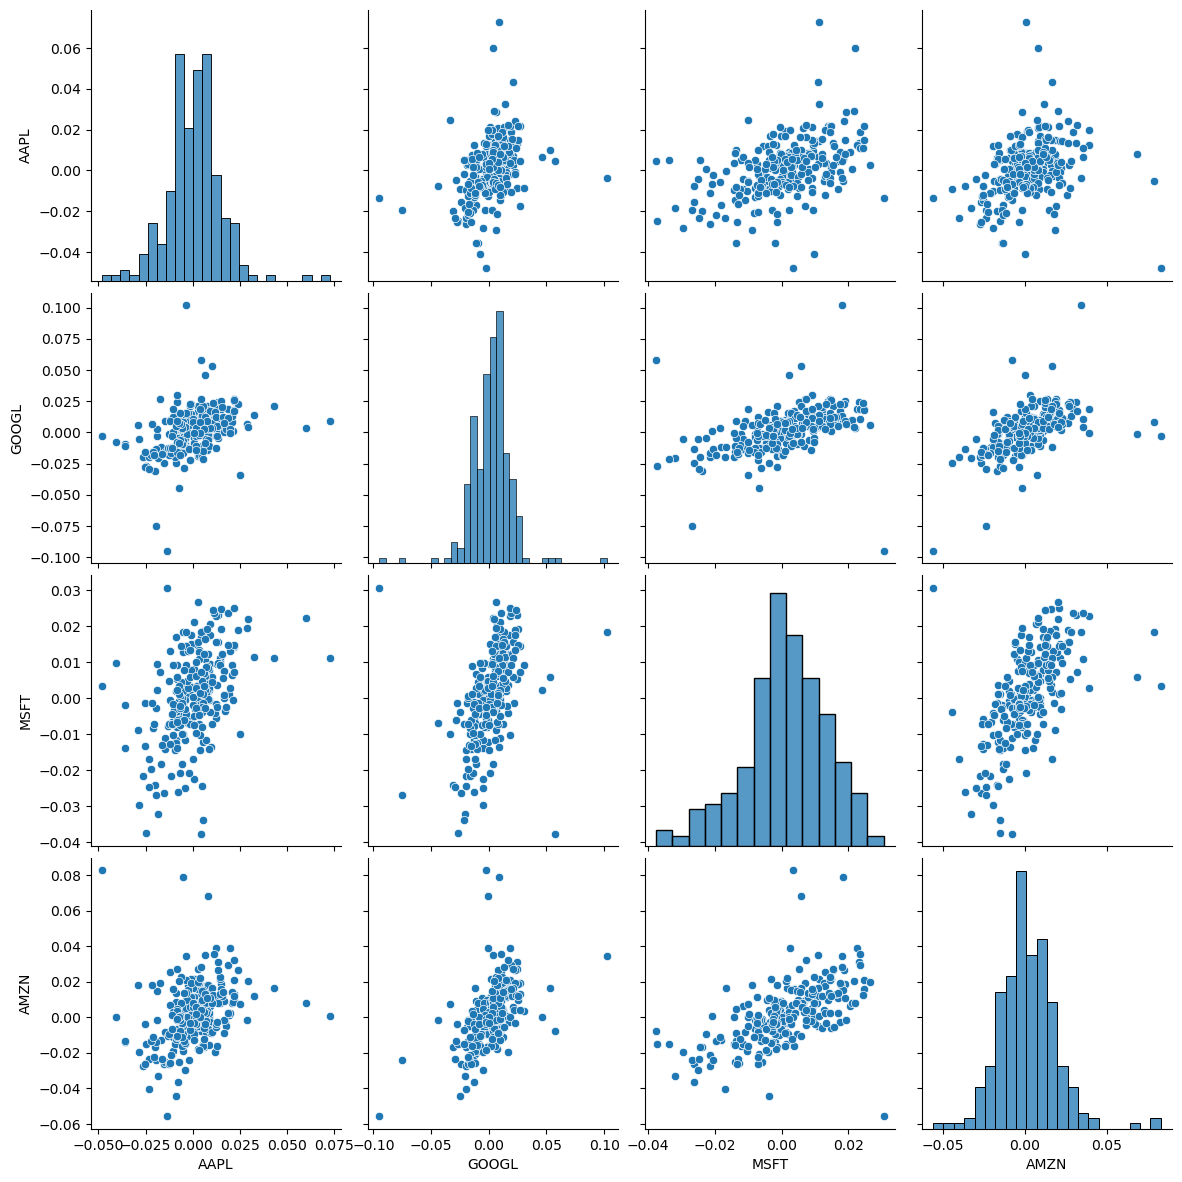

In [38]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_returns.dropna(),size=3)

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison. While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. 

Below is an example of utilizing the full power of seaborn to achieve this result.

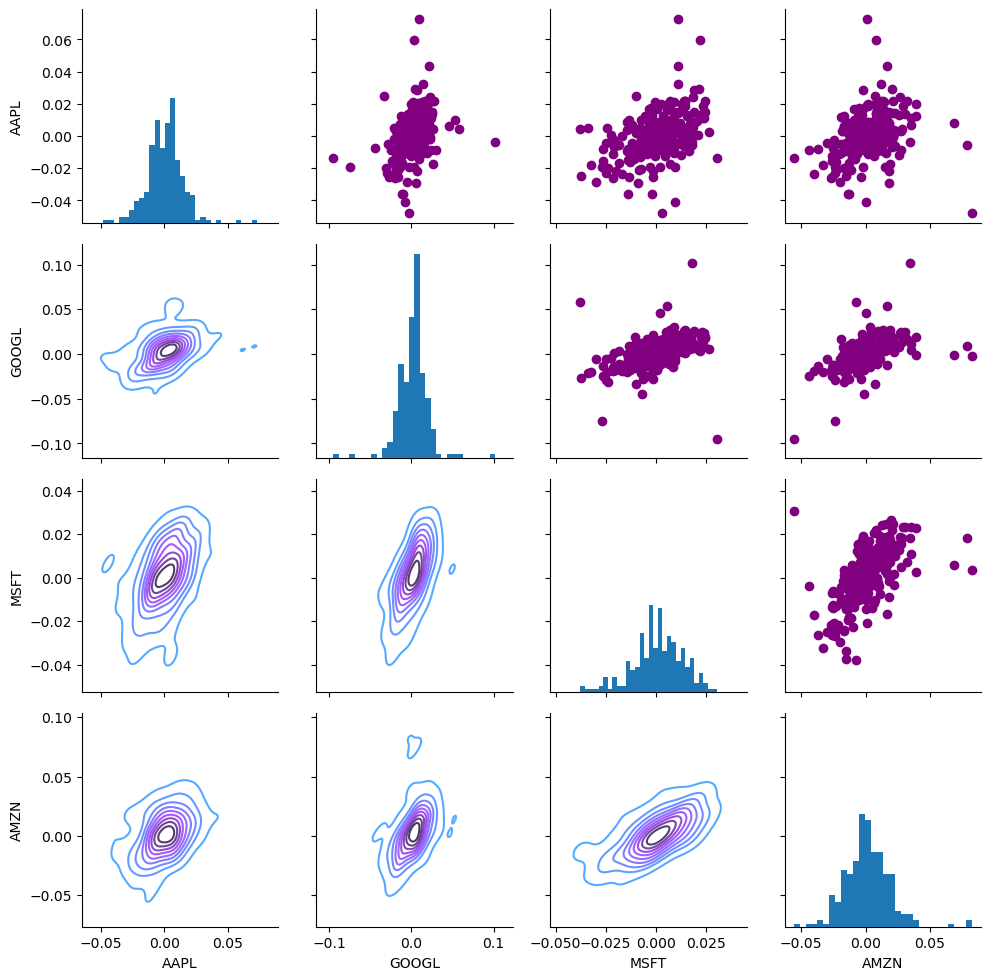

In [39]:
# Set up the figure by naming it returns_fig, call PairGrid on the DataFrame
returns_fig = sns.PairGrid(tech_returns.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, including the plot type (kde) & the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

We can also analyze the correlation of the closing prices using this exact same technique. Here it is shown, the code repeated from above with the exception of the DataFrame called.

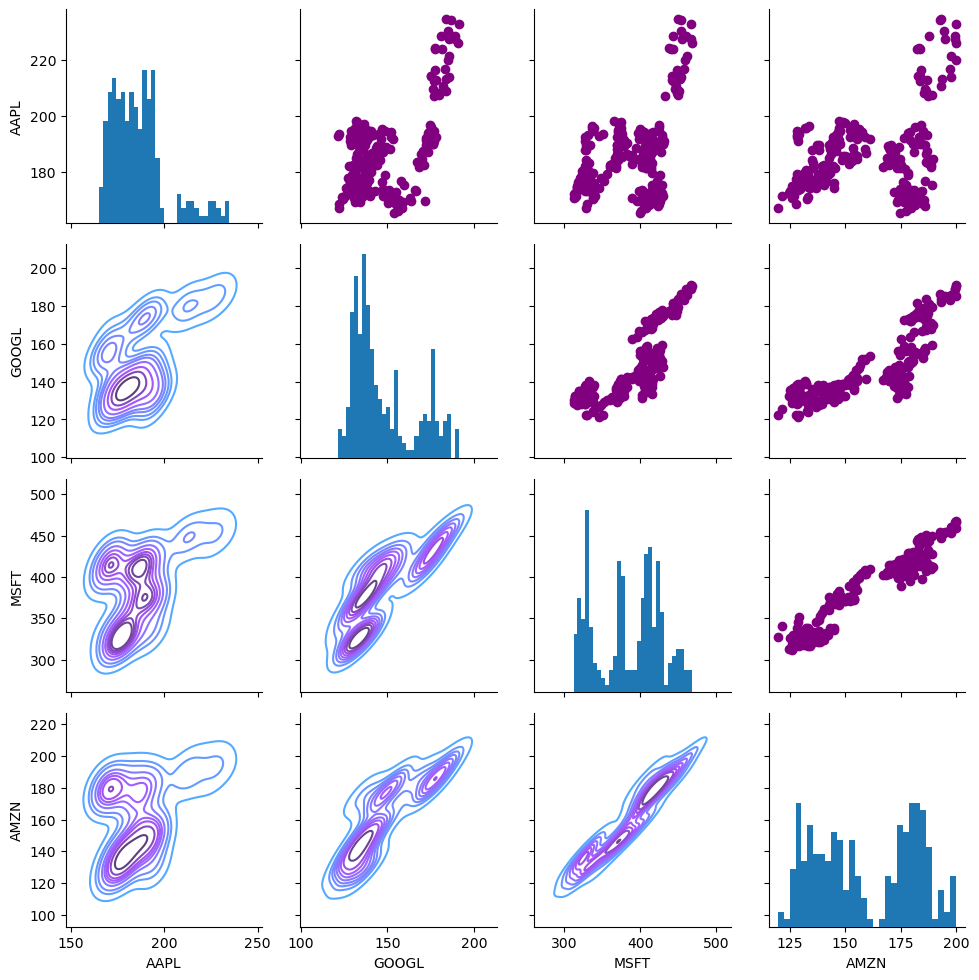

In [40]:
# Set up the figure by naming it returns_fig, call PairGrid on the DataFrame
returns_fig = sns.PairGrid(closingprice_df.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, including the plot type (kde) & the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Finally, we can also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Google and Amazon stocks.

<Axes: >

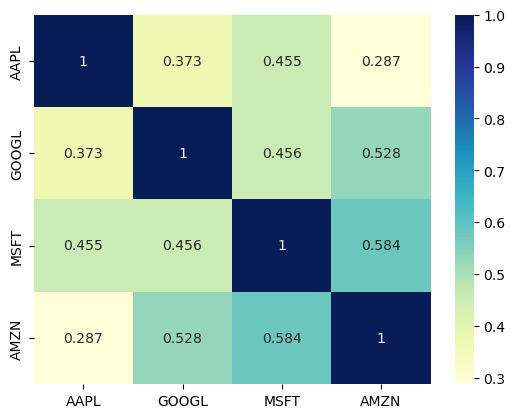

In [41]:
# Let's go ahead and use seaborn for a quick heatmap to get correlation for the daily return of the stocks.
sns.heatmap(tech_returns.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

<Axes: >

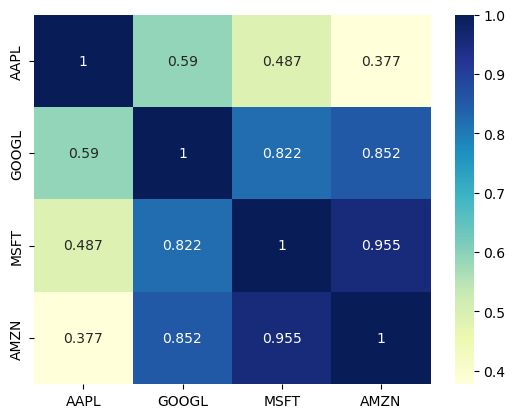

In [42]:
# Lets check out the correlation between closing prices of stocks
sns.heatmap(closingprice_df.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

##### Fantastic! Just like we suspected in our PairPlot we see here numerically and visually that Amazon and Google had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

Great! Now that we've done some daily return analysis, let's go ahead and start looking deeper into actual risk analysis.

### Risk Analysis

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns(Risk).

In [43]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_returns DataFrame
rets = tech_returns.dropna()

In [44]:
rets.head()

AAPL     GOOGL      MSFT      AMZN
Date                                              
2023-07-25  0.004514  0.005595  0.017009  0.002562
2023-07-26  0.004545  0.057769 -0.037638 -0.007589
2023-07-27 -0.006581  0.001006 -0.020872  0.000780
2023-07-28  0.013508  0.024575  0.023131  0.030877
2023-07-31  0.003166  0.001056 -0.007241  0.011119

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


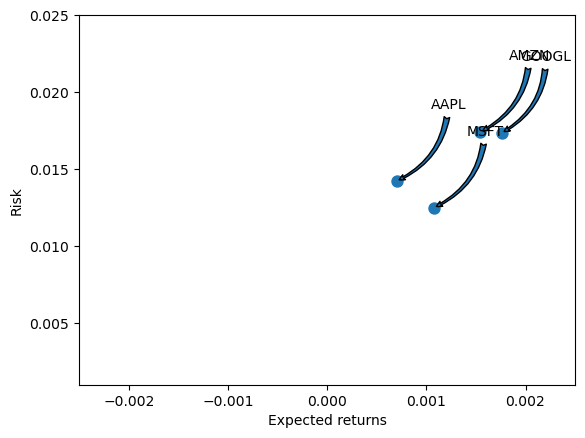

In [46]:
# Ensure necessary libraries are imported
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# List of Tech stocks for analytics
tech_list = ['AAPL', 'GOOGL', 'MSFT', 'AMZN']

# Set up Start and End time for data grab
end = datetime.now()
start = end - timedelta(days=365)

# Initialize an empty DataFrame to store closing prices
closingprice_df = pd.DataFrame()

# For-loop to fetch data for each stock and store the closing prices
for stock in tech_list:
    try:
        stock_data = yf.download(stock, start=start, end=end)
        closingprice_df[stock] = stock_data['Close']
    except Exception as e:
        print(f"Failed to fetch data for {stock}: {e}")

# Calculate daily returns
rets = closingprice_df.pct_change()

# Defining the area for the circles of scatter plot to avoid tiny little points
area = np.pi * 20

# Create the scatter plot
plt.scatter(rets.mean(), rets.std(), s=area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.xlim([-0.0025, 0.0025])
plt.ylim([0.001, 0.025])

# Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label,
        xy=(x, y), xytext=(50, 50),
        textcoords='offset points', ha='right', va='bottom',
        arrowprops=dict(arrowstyle='fancy', connectionstyle='arc3,rad=-0.3')
    )

# Show the plot
plt.show()


By looking at the scatter plot we can say these stocks have lower risk and positive expected returns.

### Value at Risk

Let's go ahead and define a value at risk parameter for our stocks. We can treat value at risk as the amount of money we could expect to lose (aka putting at risk) for a given confidence interval. There's several methods we can use for estimating a value at risk. Let's go ahead and see some of them in action.

#### Value at risk using the "bootstrap" method
For this method we will calculate the empirical quantiles from a histogram of daily returns. For more information on quantiles, check out this link: http://en.wikipedia.org/wiki/Quantile

Let's go ahead and repeat the daily returns histogram for Apple stock.

C:\Users\AKSHAY\AppData\Local\Temp\ipykernel_1388\424554809.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')


<Axes: xlabel='Daily Return', ylabel='Density'>

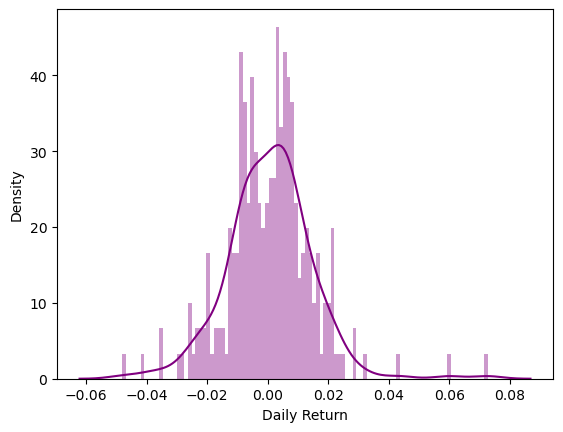

In [47]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

Now we can use quantile to get the risk value for the stock.

In [48]:
# The 0.05 empirical quantile of daily returns

# For APPL stocks
rets["AAPL"].quantile(0.05)

-0.02170573178082172

The 0.05 empirical quantile of daily returns is at -0.016. That means that with 95% confidence, our worst daily loss will not exceed 1.6%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.016 * 1,000,000 = $16,000.

In [49]:
# For AMZN stocks
rets["AMZN"].quantile(0.05)

-0.024736356048919154

In [50]:
# For GOOGL stocks
rets["GOOGL"].quantile(0.05)

-0.02097774437154311

In [51]:
# For MSFT stocks
rets["MSFT"].quantile(0.05)

-0.022087410361220316

#### Value at Risk using the Monte Carlo method
Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

Let's start with a brief explanation of what we're going to do:

We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.


Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as "drift", which is the average daily return multiplied by the change of time. The second term is known as "shock", for each time period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be.

For more info on the Monte Carlo method for stocks and simulating stock prices with GBM model ie. geometric Brownian motion (GBM).

check out the following link: http://www.investopedia.com/articles/07/montecarlo.asp

To demonstrate a basic Monte Carlo method, we will start with just a few simulations. First we'll define the variables we'll be using in the Google stock DataFrame GOOGL


In [52]:
rets.head()

AAPL     GOOGL      MSFT      AMZN
Date                                              
2023-07-24       NaN       NaN       NaN       NaN
2023-07-25  0.004514  0.005595  0.017009  0.002562
2023-07-26  0.004545  0.057769 -0.037638 -0.007589
2023-07-27 -0.006581  0.001006 -0.020872  0.000780
2023-07-28  0.013508  0.024575  0.023131  0.030877

In [53]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for GOOGL
mu = rets.mean()['GOOGL']

# Now let's grab the volatility of the stock from the std() of the average return for GOOGL
sigma = rets.std()['GOOGL']

Next, we will create a function that takes in the starting price and number of days, and uses the sigma and mu we already calculated form our daily returns.

In [54]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

Awesome! Now lets put above function to work.

In [55]:
# For Google Stock - GOOGL
GOOGL.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-07-24  121.660004  123.000000  120.980003  121.529999  121.390678   
2023-07-25  121.360001  123.150002  121.019997  122.209999  122.069901   
2023-07-26  130.070007  130.979996  128.320007  129.270004  129.121811   
2023-07-27  131.669998  133.240005  128.789993  129.399994  129.251648   
2023-07-28  130.779999  133.740005  130.570007  132.580002  132.428009   

              Volume  
Date                  
2023-07-24  29686100  
2023-07-25  52509600  
2023-07-26  61682100  
2023-07-27  44952100  
2023-07-28  36591200

Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

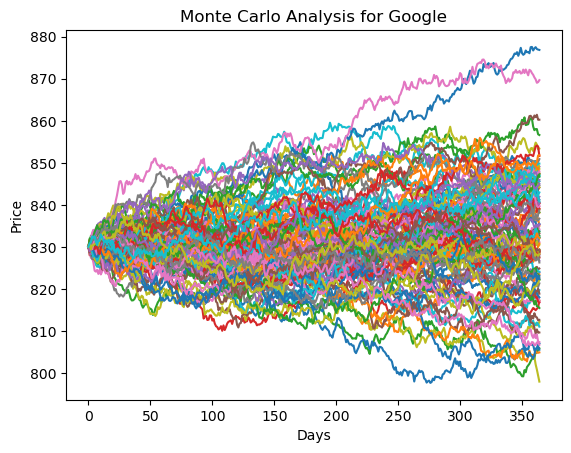

In [56]:
start_price = 830.09

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [57]:
# For Amazon Stock - AMZN
AMZN.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-07-24  130.309998  131.660004  128.350006  128.800003  128.800003   
2023-07-25  129.309998  129.580002  128.529999  129.130005  129.130005   
2023-07-26  126.510002  129.080002  126.110001  128.149994  128.149994   
2023-07-27  131.000000  132.630005  127.790001  128.250000  128.250000   
2023-07-28  129.690002  133.009995  129.330002  132.210007  132.210007   

              Volume  
Date                  
2023-07-24  45591100  
2023-07-25  39236700  
2023-07-26  53910100  
2023-07-27  52610700  
2023-07-28  46317400

Text(0.5, 1.0, 'Monte Carlo Analysis for Amazon')

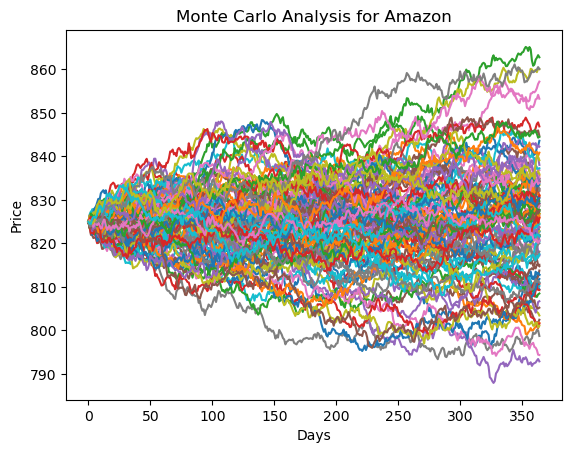

In [58]:
start_price = 824.95

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Amazon')

In [59]:
# For Apple Stock - AAPL
AAPL.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-07-24  193.410004  194.910004  192.250000  192.750000  191.731766   
2023-07-25  193.330002  194.440002  192.919998  193.619995  192.597153   
2023-07-26  193.669998  195.639999  193.320007  194.500000  193.472504   
2023-07-27  196.020004  197.199997  192.550003  193.220001  192.199280   
2023-07-28  194.669998  196.630005  194.139999  195.830002  194.795486   

              Volume  MA for 10 days  MA for 20 days  MA for 50 days  \
Date                                                                   
2023-07-24  45377800             NaN             NaN             NaN   
2023-07-25  37283200             NaN             NaN             NaN   
2023-07-26  47471900             NaN             NaN             NaN   
2023-07-27  47460200             NaN             NaN             NaN   
2023-07-28  48291400             NaN             NaN             NaN   

            MA for 100 days  Daily Return  
Date                                       
2023-07-24              NaN           NaN  
2023-07-25              NaN      0.004514  
2023-07-26              NaN      0.004545  
2023-07-27              NaN     -0.006581  
2023-07-28              NaN      0.013508

Text(0.5, 1.0, 'Monte Carlo Analysis for Apple')

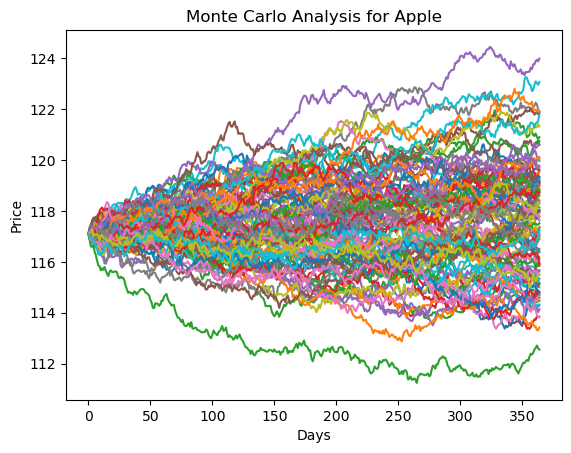

In [60]:
start_price = 117.10

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Apple')

In [61]:
# For Microsoft Stock - MSFT
MSFT.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-07-24  345.850006  346.920013  342.309998  345.109985  342.431244   
2023-07-25  347.109985  351.890015  345.070007  350.980011  348.255707   
2023-07-26  341.440002  344.670013  333.109985  337.769989  335.148224   
2023-07-27  340.480011  341.329987  329.049988  330.720001  328.152985   
2023-07-28  333.670013  340.010010  333.170013  338.369995  335.743591   

              Volume  
Date                  
2023-07-24  26678100  
2023-07-25  41637700  
2023-07-26  58383700  
2023-07-27  39635300  
2023-07-28  28484900

Text(0.5, 1.0, 'Monte Carlo Analysis for Microsoft')

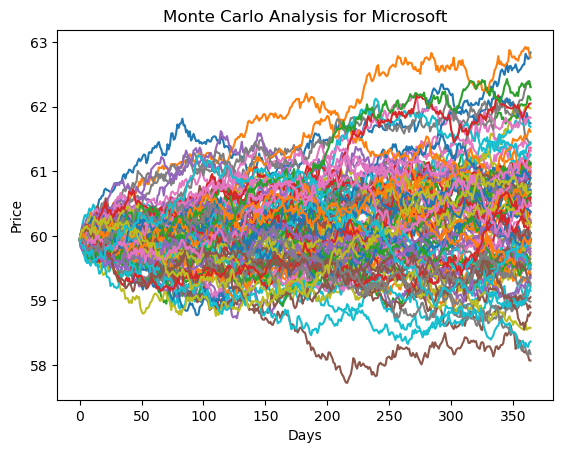

In [62]:
start_price = 59.94

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Microsoft')

Let's go ahead and get a histogram of the end results for a much larger run. (note: This could take a little while to run , depending on the number of runs chosen)

In [63]:
# Lets start with Google stock price
start_price = 830.09

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Now that we have our array of simulations, we can go ahead and plot a histogram ,as well as use qunatile to define our risk for this stock.

For more info on quantiles, check out this link: http://en.wikipedia.org/wiki/Quantile

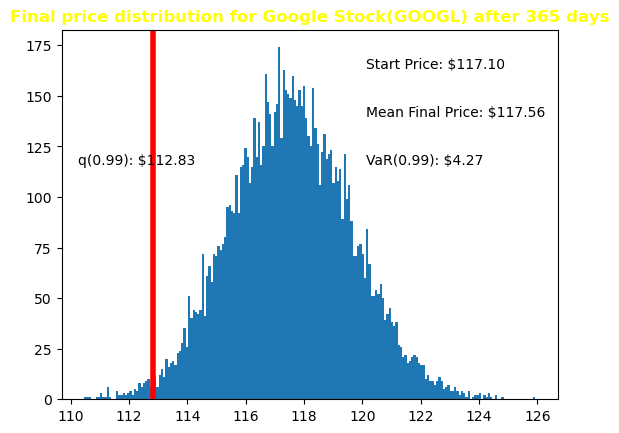

In [67]:
# Ensure necessary libraries are imported
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'simulations', 'start_price', and 'days' are already defined
# Define q as the 1% empirical quantile
q = np.percentile(simulations, 1)

# Plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot
# Starting price
plt.figtext(0.6, 0.8, s='Start Price: $%.2f' % start_price)

# Mean ending price
plt.figtext(0.6, 0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, s='VaR(0.99): $%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Plot title
plt.title("Final price distribution for Google Stock(GOOGL) after %s days" % days, weight='bold', color='yellow')

# Show the plot
plt.show()


Awesome! Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Google Stock(GOOGL), which looks to be $17.98 for every investment of 
830.09 (The price of one initial Google Stock).

This basically means for every initial GOOGL stock you purchase you're putting about $17.98 at risk 99% of the time from our Monte Carlo Simulation.


##### Now lets plot remaining Stocks to estimate the VaR with our Monte Carlo Simulation.

In [68]:
# For Amazon Stock Price
start_price = 824.95

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

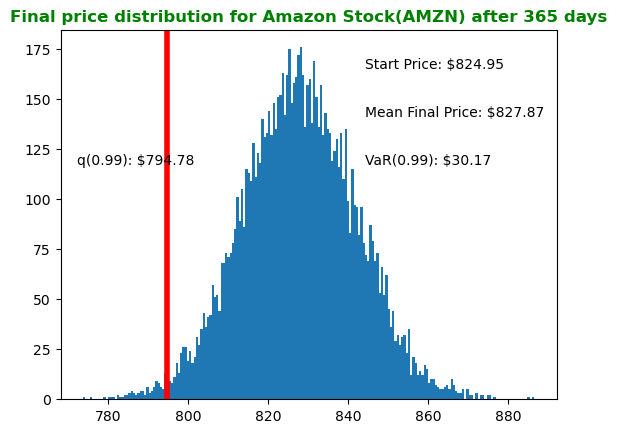

In [70]:
# Ensure necessary libraries are imported
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'simulations', 'start_price', and 'days' are already defined
# Define q as the 1% empirical quantile
q = np.percentile(simulations, 1)

# Plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot
# Starting price
plt.figtext(0.6, 0.8, s='Start Price: $%.2f' % start_price)

# Mean ending price
plt.figtext(0.6, 0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, s='VaR(0.99): $%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Plot title
plt.title("Final price distribution for Amazon Stock(AMZN) after %s days" % days, weight='bold', color='green')

# Show the plot
plt.show()


This basically means for every initial AMZN stock you purchase you're putting about $18.13 at risk 99% of the time from our Monte Carlo Simulation.

In [72]:
# For Apple Stock Price
start_price = 117.10

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

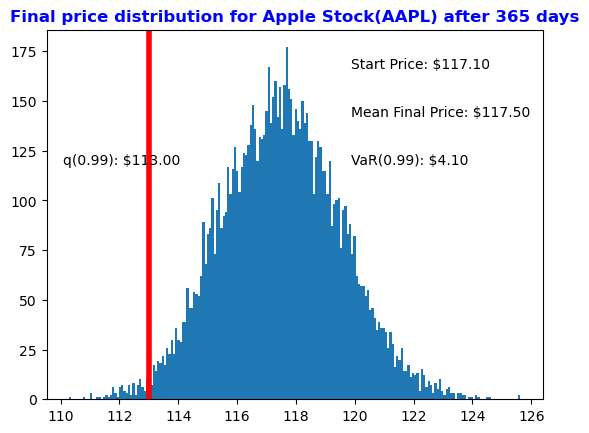

In [73]:
# Ensure necessary libraries are imported
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'simulations', 'start_price', and 'days' are already defined
# Define q as the 1% empirical quantile
q = np.percentile(simulations, 1)

# Plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot
# Starting price
plt.figtext(0.6, 0.8, s='Start Price: $%.2f' % start_price)

# Mean ending price
plt.figtext(0.6, 0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, s='VaR(0.99): $%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Plot title
plt.title("Final price distribution for Apple Stock(AAPL) after %s days" % days, weight='bold', color='blue')

# Show the plot
plt.show()


Great! This basically means for every initial AAPL stock you purchase you're putting about $2.48 at risk 99% of the time from our Monte Carlo Simulation.

In [74]:
# For Microsoft Stock Price
start_price = 59.94

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

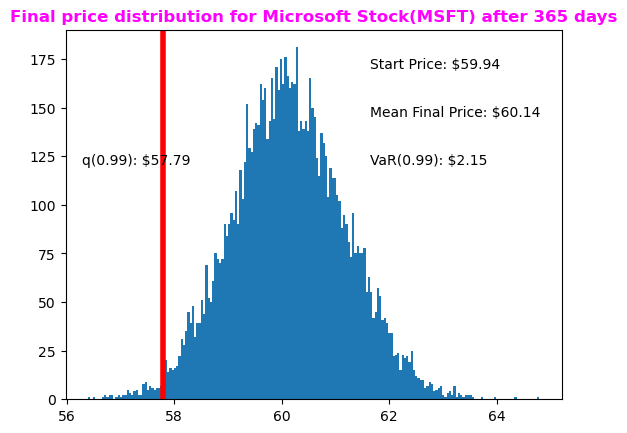

In [76]:
# Ensure necessary libraries are imported
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'simulations', 'start_price', and 'days' are already defined
# Define q as the 1% empirical quantile
q = np.percentile(simulations, 1)

# Plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot
# Starting price
plt.figtext(0.6, 0.8, s='Start Price: $%.2f' % start_price)

# Mean ending price
plt.figtext(0.6, 0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, s='VaR(0.99): $%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Plot title
plt.title("Final price distribution for Microsoft Stock(MSFT) after %s days" % days, weight='bold', color='magenta')

# Show the plot
plt.show()


Nice, This basically means for every initial MSFT stock you purchase you're putting about $1.28 at risk 99% of the time from our Monte Carlo Simulation.

Now lets estiamte the Value at Risk(VaR) for a stock related to other domains.


We'll estimate the VaR for:
 - Johnson & Johnson > JNJ (U.S.: NYSE) [JNJ](http://quotes.wsj.com/JNJ)
 - Wal-Mart Stores Inc. > WMT (U.S.: NYSE) [WMT](http://quotes.wsj.com/WMT)
 - Nike Inc. > NKE (U.S.: NYSE) [NKE](http://quotes.wsj.com/NKE)
 

By using the above methods to get Value at Risk.

In [79]:
import yfinance as yf
from datetime import datetime

# List of NYSE_stocks for analytics
NYSE_list = ['JNJ', 'NKE', 'WMT']

# Set up Start and End time for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# For-loop for grabbing data and setting as a dataframe
for stock in NYSE_list:
    try:
        data = yf.download(stock, start=start, end=end)
        globals()[stock] = data
    except Exception as e:
        print(f"Failed to fetch data for {stock}: {e}")

# Example usage: print the first few rows of JNJ data
if 'JNJ' in globals():
    print(JNJ.head())
else:
    print("Data for JNJ was not fetched.")


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-07-24  171.500000  173.820007  170.990005  171.080002  165.886841   
2023-07-25  170.449997  172.679993  169.750000  172.389999  167.157089   
2023-07-26  172.000000  173.850006  171.399994  172.720001  167.477066   
2023-07-27  172.179993  174.289993  172.039993  173.690002  168.417618   
2023-07-28  174.000000  175.360001  173.229996  174.479996  169.183640   

              Volume  
Date                  
2023-07-24  15155400  
2023-07-25  13790100  
2023-07-26  14288200  
2023-07-27  12446400  
2023-07-28  14138800  


Let's go ahead and play aorund with the JNJ(Johnson & Johnson) Stock DataFrame to get a feel for the data.

In [80]:
JNJ.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-07-24  171.500000  173.820007  170.990005  171.080002  165.886841   
2023-07-25  170.449997  172.679993  169.750000  172.389999  167.157089   
2023-07-26  172.000000  173.850006  171.399994  172.720001  167.477066   
2023-07-27  172.179993  174.289993  172.039993  173.690002  168.417618   
2023-07-28  174.000000  175.360001  173.229996  174.479996  169.183640   

              Volume  
Date                  
2023-07-24  15155400  
2023-07-25  13790100  
2023-07-26  14288200  
2023-07-27  12446400  
2023-07-28  14138800

In [81]:
JNJ.describe()

Open        High         Low       Close   Adj Close  \
count  251.000000  251.000000  251.000000  251.000000  251.000000   
mean   155.897331  156.931673  154.786693  155.876056  153.613047   
std      7.229776    7.388670    7.237943    7.296248    6.275229   
min    143.820007  145.410004  143.130005  144.380005  142.205338   
25%    149.945000  150.540001  148.784996  149.820000  147.980202   
50%    155.919998  156.690002  155.020004  155.789993  153.500000   
75%    160.414993  161.330002  159.290001  160.464996  157.921890   
max    174.000000  175.970001  173.229996  174.479996  169.183640   

             Volume  
count  2.510000e+02  
mean   1.105112e+07  
std    1.618335e+07  
min    3.246200e+06  
25%    5.837550e+06  
50%    6.947400e+06  
75%    9.110200e+06  
max    1.513195e+08

In [82]:
JNJ.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-07-24 to 2024-07-22
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


Now that we've seen the DataFrame, let's go ahead and plot out the closing prices of NYSE stocks.

<Axes: title={'center': 'Closing Price - JNJ'}, xlabel='Date'>

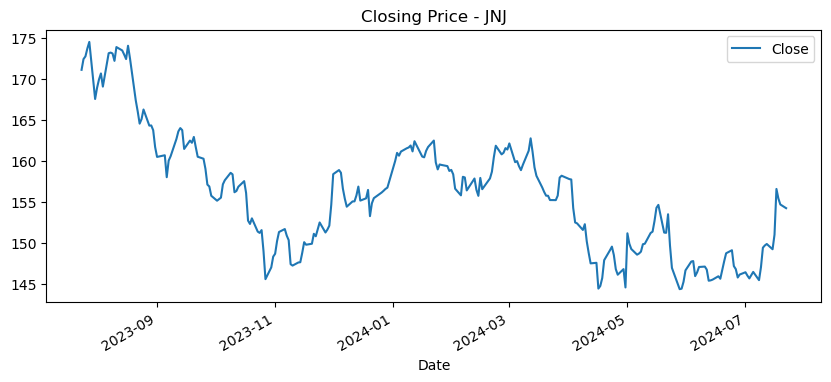

In [83]:
# Let's see a historical view of the closing price for JNJ(Johnson & Johnson)
JNJ['Close'].plot(title='Closing Price - JNJ',legend=True, figsize=(10,4))

<Axes: title={'center': 'Closing Price - NKE'}, xlabel='Date'>

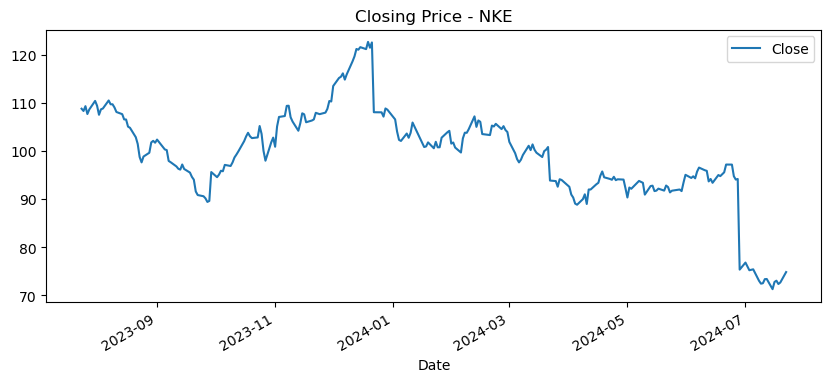

In [84]:
# Let's see a historical view of the closing price for NKE(Nike Inc.)
NKE['Close'].plot(title='Closing Price - NKE',legend=True, figsize=(10,4))

<Axes: title={'center': 'Closing Price - WMT'}, xlabel='Date'>

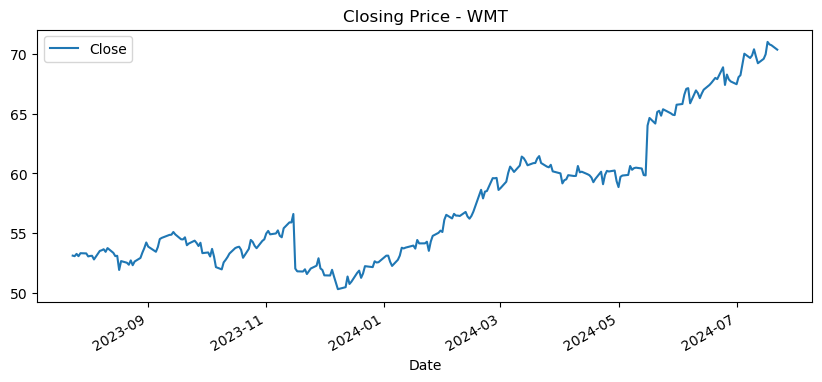

In [96]:
# Let's see a historical view of the closing price for WMT(Wal-Mart Stores Inc.)
WMT['Close'].plot(title='Closing Price - WMT',legend=True, figsize=(10,4))

### Value at risk using the "Bootstrap" method

we will calculate the empirical quantiles from a histogram of daily returns.

Let's go ahead and use pandas to retrieve the daily returns for the JNJ, WMT & NKE stock.

In [97]:
# We'll use pct_change to find the percent change for each day

#For JNJ stocks
JNJ['Daily Return'] = JNJ['Close'].pct_change()

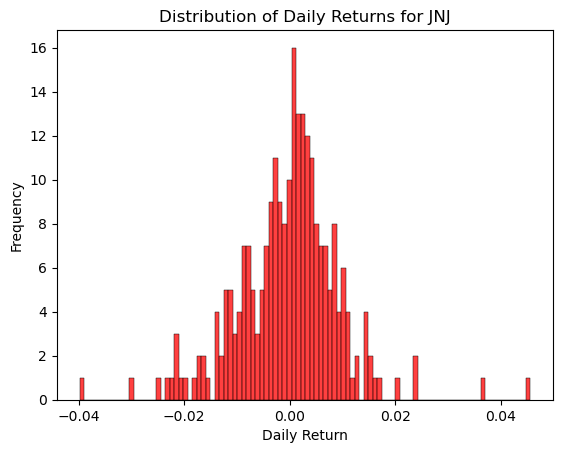

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure 'JNJ' DataFrame has 'Daily Return' column
if 'JNJ' in globals() and 'Daily Return' in JNJ.columns:
    # Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
    sns.histplot(JNJ['Daily Return'].dropna(), bins=100, color='red')

    plt.xlabel('Daily Return')
    plt.ylabel('Frequency')
    plt.title('Distribution of Daily Returns for JNJ')
    plt.show()
else:
    print("Data for JNJ or 'Daily Return' column is not available.")


In [99]:
(JNJ['Daily Return'].dropna()).quantile(0.05)

-0.016803340647645947

The 0.05 empirical quantile of JNJ stock daily returns is at -0.010. That means that with 95% confidence, our worst daily loss will not exceed 1%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.010 * 1,000,000 = $10,000.

In [101]:
# For WMT stocks
WMT['Daily Return'] = WMT['Close'].pct_change()

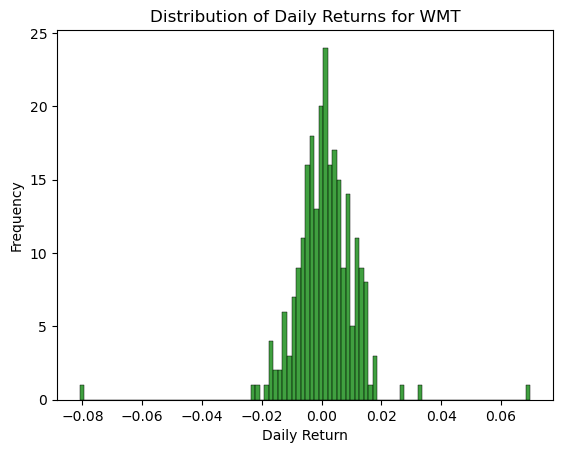

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure 'WMT' DataFrame has 'Daily Return' column
if 'WMT' in globals() and 'Daily Return' in WMT.columns:
    # Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
    sns.histplot(WMT['Daily Return'].dropna(), bins=100, color='green')

    plt.xlabel('Daily Return')
    plt.ylabel('Frequency')
    plt.title('Distribution of Daily Returns for WMT')
    plt.show()
else:
    print("Data for WMT or 'Daily Return' column is not available.")


In [103]:
(WMT['Daily Return'].dropna()).quantile(0.05)

-0.012403407263630406

The 0.05 empirical quantile of WMT stock daily returns is at -0.013. That means that with 95% confidence, our worst daily loss will not exceed 1.3%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.013 * 1,000,000 = $13,000.

In [104]:
# For NKE stocks
NKE['Daily Return'] = NKE['Close'].pct_change()

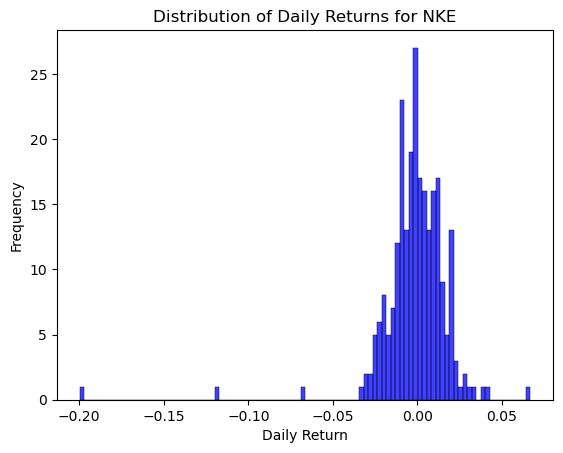

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure 'NKE' DataFrame has 'Daily Return' column
if 'NKE' in globals() and 'Daily Return' in NKE.columns:
    # Plot the distribution of daily returns for NKE
    sns.histplot(NKE['Daily Return'].dropna(), bins=100, color='blue')

    plt.xlabel('Daily Return')
    plt.ylabel('Frequency')
    plt.title('Distribution of Daily Returns for NKE')
    plt.show()
else:
    print("Data for NKE or 'Daily Return' column is not available.")

    

In [106]:
(NKE['Daily Return'].dropna()).quantile(0.05)

-0.023773701644966116

The 0.05 empirical quantile of NKE stock daily returns is at -0.018. That means that with 95% confidence, our worst daily loss will not exceed 1.8%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.018 * 1,000,000 = $18,000.